High index (n=2.39): thickness = 51.17 nm
Low index (n=1.956338417): thickness = 62.65 nm
Number of layer pairs: 5
Total layers: 11
Total stack height: 569.1 nm
Stack positioned from y=0 to y=0.6203 µm
Verification: calculated height = 620.27 nm

Source position: y = 1.020 µm (above stack)
Reflection plane: y = 0.770 µm (above stack)
Transmission plane: y = -0.150 µm (below stack)

Frequency range: 1.429 to 3.333 (1/µm)
Wavelength range: 300 to 700 nm
Gaussian pulse center: 500 nm, width: 1.905 (1/µm)

Starting normalization run (no DBR)...


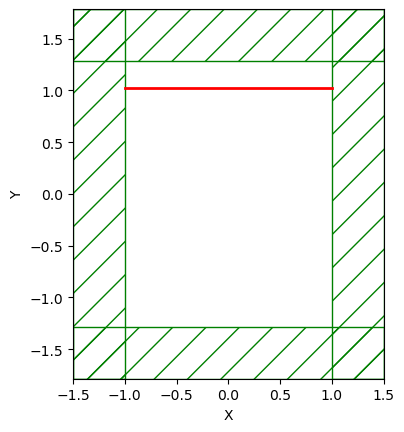

-----------
Initializing structure...
time for choose_chunkdivision = 0.000379086 s
Working in 2D dimensions.
Computational cell is 3 x 3.57 x 0 with resolution 200
time for set_epsilon = 0.377755 s
-----------
on time step 1173 (time=2.9325), 0.00341301 s/step
on time step 2244 (time=5.61), 0.00373766 s/step
on time step 3763 (time=9.4075), 0.00263402 s/step
on time step 4838 (time=12.095), 0.00372153 s/step
on time step 5864 (time=14.66), 0.00390158 s/step
on time step 6929 (time=17.3225), 0.00375598 s/step
on time step 8113 (time=20.2825), 0.00337984 s/step
on time step 9306 (time=23.265), 0.00335376 s/step
on time step 10528 (time=26.32), 0.0032761 s/step
on time step 11669 (time=29.1725), 0.00350606 s/step
on time step 13252 (time=33.13), 0.00252805 s/step
on time step 14279 (time=35.6975), 0.0038969 s/step
on time step 15379 (time=38.4475), 0.00363655 s/step
on time step 16594 (time=41.485), 0.00329347 s/step
on time step 17805 (time=44.5125), 0.00330475 s/step
on time step 18966

field decay(t = 100.0025): 5.164107870102356e-13 / 0.1941787940831337 = 2.659460264178718e-12
run 0 finished at t = 100.0025 (40001 timesteps)
Normalization run complete.
Starting DBR simulation...
     block, center = (0,0.025585,0)
          size (1e+20,0.05117,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.7121,5.7121,5.7121)
     block, center = (0,0.082495,0)
          size (1e+20,0.06265,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.82726,3.82726,3.82726)
     block, center = (0,0.139405,0)
          size (1e+20,0.05117,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.7121,5.7121,5.7121)
     block, center = (0,0.196315,0)
          size (1e+20,0.06265,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.82726,3.82726,3.82726)
     block, center = (0,0.253225,0)
          size (

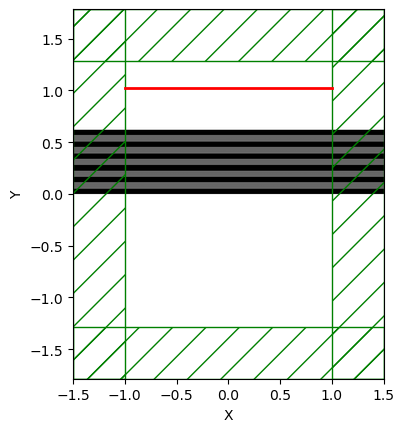

-----------
Initializing structure...
time for choose_chunkdivision = 0.000608921 s
Working in 2D dimensions.
Computational cell is 3 x 3.57 x 0 with resolution 200
     block, center = (0,0.025585,0)
          size (1e+20,0.05117,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.7121,5.7121,5.7121)
     block, center = (0,0.082495,0)
          size (1e+20,0.06265,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.82726,3.82726,3.82726)
     block, center = (0,0.139405,0)
          size (1e+20,0.05117,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.7121,5.7121,5.7121)
     block, center = (0,0.196315,0)
          size (1e+20,0.06265,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.82726,3.82726,3.82726)
     block, center = (0,0.253225,0)
          size (1e+20,0.05117,1e+20)
          ax

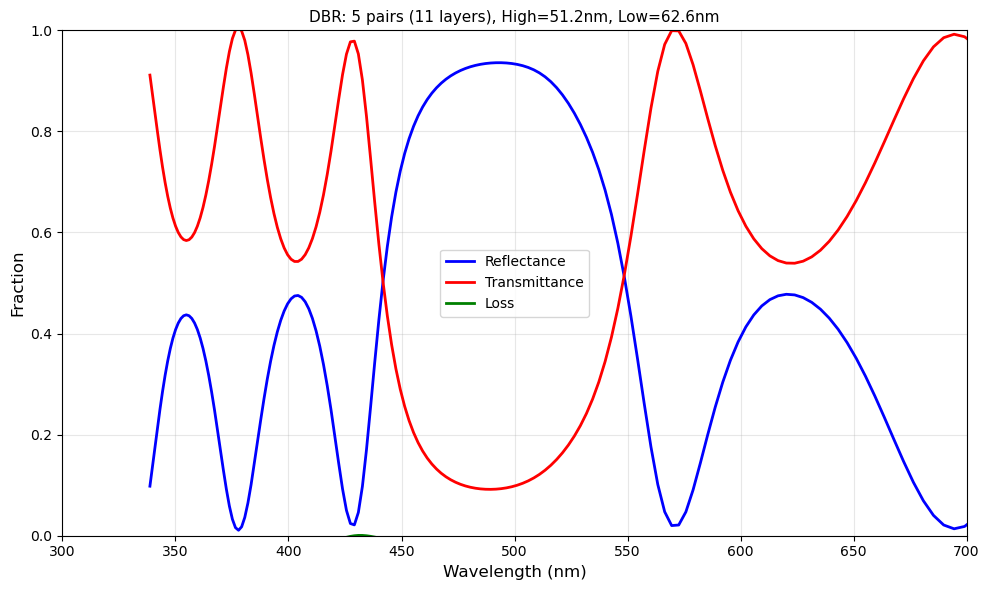


Results at key wavelengths:
  λ = 399.6 nm: R=0.459, T=0.556, Loss=-0.015
  λ = 498.8 nm: R=0.934, T=0.097, Loss=-0.031
  λ = 598.9 nm: R=0.383, T=0.643, Loss=-0.027

Peak reflectance: R=0.936 at λ=494.1 nm

⚠️  WARNING: Negative loss detected!


In [ ]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

resolution = 200   # pixels per µm
res_label = f"{resolution} pix/µm"


porosity=0.4
n_gan = 2.39
n_porous  = (porosity*1+(1-porosity)*n_gan**2)**0.5
n_algan = 2.12
n_si=3.47
eps_gan = n_gan**2
eps_porous  = n_porous**2
eps_algan = n_algan**2
eps_si=n_si**2

# DBR parameters
thickness_high = 0.05117  
thickness_low = 0.06265   
n_pairs = 5               
n_layers = 11    

# total stack height
total_stack_height = n_pairs * (thickness_high + thickness_low)

print(f"High index (n={n_gan}): thickness = {thickness_high*1000:.2f} nm")
print(f"Low index (n={n_porous}): thickness = {thickness_low*1000:.2f} nm")
print(f"Number of layer pairs: {n_pairs}")
print(f"Total layers: {n_layers}")
print(f"Total stack height: {total_stack_height*1000:.1f} nm")

# cell dimensions
sx = 3.0                
sy = total_stack_height + 3.0  
cell = mp.Vector3(sx, sy, 0)

# PML
dpml = 0.5               # µm
pml_layers = [mp.PML(dpml)]

# wavelength range: 300 nm to 700 nm
lam_min = 0.3            # µm (300 nm)
lam_max = 0.7            # µm (700 nm)
fmax = 1.0 / lam_min     # = 3.333 (1/µm)
fmin = 1.0 / lam_max     # = 1.429 (1/µm)
fcen = 1/0.5             # center frequency = 2.0 (500 nm)
df = fmax - fmin         # bandwidth


geometry = []
y_bottom = 0.0  # start from y = 0

for i in range(n_layers):
    # Alternate between high and low index
    if i % 2 == 0:  
        mat_eps = eps_gan
        layer_thick = thickness_high
    else:           
        mat_eps = eps_porous
        layer_thick = thickness_low
    
    # Center of this layer
    y_center = y_bottom + 0.5 * layer_thick
    
    geometry.append(mp.Block(size=mp.Vector3(mp.inf, layer_thick, mp.inf),
                             center=mp.Vector3(0, y_center, 0),
                             material=mp.Medium(epsilon=mat_eps)))
    
    y_bottom += layer_thick
layergan=0.67
y_center = y_bottom + 0.5 * layergan
geometry.append(mp.Block(size=mp.Vector3(mp.inf, layergan, mp.inf),
                             center=mp.Vector3(0, y_center, 0),
                             material=mp.Medium(epsilon=eps_gan)))
y_bottom += layer_thick


# flux planes: reflection (between source and stack) and transmission (below stack)
refl_y = y_bottom + 0.15  # between source and stack top
tran_y = -0.15            # below stack bottom (at y=0)

print(f"\nSource position: y = {src_y:.3f} µm (above stack)")
print(f"Reflection plane: y = {refl_y:.3f} µm (above stack)")
print(f"Transmission plane: y = {tran_y:.3f} µm (below stack)")

nfreq = 200

# flux regions - HORIZONTAL lines perpendicular to propagation direction
refl_fr = mp.FluxRegion(center=mp.Vector3(0, refl_y, 0), 
                        size=mp.Vector3(sx-2*dpml, 0, 0))
tran_fr = mp.FluxRegion(center=mp.Vector3(0, tran_y, 0), 
                        size=mp.Vector3(sx-2*dpml, 0, 0))

# probe point to decide when fields have decayed
pt = mp.Vector3(0, tran_y, 0)

print(f"\nFrequency range: {fmin:.3f} to {fmax:.3f} (1/µm)")
print(f"Wavelength range: {lam_min*1e3:.0f} to {lam_max*1e3:.0f} nm")
print(f"Gaussian pulse center: {1/fcen*1e3:.0f} nm, width: {df:.3f} (1/µm)")
print("\nStarting normalization run (no DBR)...")

# normalization run (no geometry)
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)

from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

refl = sim.add_flux(fcen, df, nfreq, refl_fr)
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

# run until pulse has propagated through and decayed
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

# save flux field data and incident power
straight_refl_data = sim.get_flux_data(refl)
straight_tran_flux = np.array(mp.get_fluxes(tran))

print("Normalization run complete.")
print("Starting DBR simulation...")

sim.reset_meep()

#run with DBR geometry
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

refl = sim.add_flux(fcen, df, nfreq, refl_fr)
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

# load negated incident fields for reflection measurement
sim.load_minus_flux_data(refl, straight_refl_data)

# run until pulse has propagated through and decayed
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

# get flux data
dbr_refl_flux = np.array(mp.get_fluxes(refl))
dbr_tran_flux = np.array(mp.get_fluxes(tran))
freqs = np.array(mp.get_flux_freqs(refl))

print("DBR simulation complete.")

# compute reflectance, transmittance, and loss
wls = 1.0 / freqs  

R = -dbr_refl_flux / straight_tran_flux  
T = dbr_tran_flux / straight_tran_flux
Loss = 1 - R - T

# plotting
if mp.am_master():
    plt.figure(figsize=(10, 6))
    plt.plot(wls*1e3, R, 'b-', label='Reflectance', linewidth=2)
    plt.plot(wls*1e3, T, 'r-', label='Transmittance', linewidth=2)
    plt.plot(wls*1e3, Loss, 'g-', label='Loss', linewidth=2)
    plt.xlabel('Wavelength (nm)', fontsize=12)
    plt.ylabel('Fraction', fontsize=12)
    plt.title(f"DBR: {n_pairs} pairs ({n_layers} layers), High={thickness_high*1000:.1f}nm, Low={thickness_low*1000:.1f}nm", fontsize=11)
    plt.legend(loc='best', fontsize=10)
    plt.xlim(300, 700)
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dbr_reflectance_sweep.png', dpi=150)
    plt.show()
    
    
    print(f"\nResults at key wavelengths:")
    for target_wl in [400, 500, 600]:
        idx = np.argmin(np.abs(wls*1e3 - target_wl))
        actual_wl = wls[idx]*1e3
        print(f"  λ = {actual_wl:.1f} nm: R={R[idx]:.3f}, T={T[idx]:.3f}, Loss={Loss[idx]:.3f}")
    
    # Find peak reflectance
    max_R_idx = np.argmax(R)
    print(f"\nPeak reflectance: R={R[max_R_idx]:.3f} at λ={wls[max_R_idx]*1e3:.1f} nm")
    
    # Check for unphysical results
    if np.any(R > 1.0) or np.any(R < -0.01):
        print("\n⚠️  WARNING: Unphysical reflectance values detected!")
        print(f"   Max R = {np.max(R):.3f}, Min R = {np.min(R):.3f}")
    if np.any(T < -0.01):
        print("\n⚠️  WARNING: Negative transmittance detected!")
    if np.any(Loss < -0.01):
        print("\n⚠️  WARNING: Negative loss detected!")